### "Número óptimo de clústeres para agrupamiento con K-medias"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
# Usaremos datos simulados.
# 3 grupos en un espacio de 8 dimensiones.

X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Definir una función que calcule la "suma interna total de cuadrados".
- X         :   Datos.
- centers   :   Matriz que contiene las coordenadas del centroide. Calculado por kmeans.
- clusters  :   Matriz de etiquetas de clústeres. Calculado por kmeans. <br> <br>


In [4]:
# W(Ck)=  ∑  ∑  (x−μi)^2  -> (fórmula de clase) -> Suma interna total de cuadrados 
 
def total_internal_ss(X, centers, clusters):
    total_clusters = centers.shape[0]
    total_filas = X.shape[0]
    total_columnas = centers.shape[1]
    centroide = np.zeros((total_filas, total_columnas))
   
    for k in range(total_clusters):
        cluster = (clusters == k)
        for i in range(total_columnas):
            centroide[cluster, i] = centers[k, i]             
    return np.sum((X - centroide)**2)     #   La suma de las distancias euclídeas al cuadrado entre cada observación (x) 
                                          #   y el centroide (μi) de su cluster.

2). Visualizar con un diagrama de dispersión la "suma interna total de cuadrados" vs N# de grupos y determinar el número de clusteres.

In [5]:
n_grupos = np.array(range(2,10))  # comienzo a partir de 2 porque para 1 no me da información.                
STC = np.array([])                             
for k in n_grupos:
    k_means = KMeans(n_clusters = k)
    clusters = k_means.fit(X).labels_
    centers = k_means.cluster_centers_
    STC = np.append(STC, total_internal_ss(X,centers,clusters))
print(STC)

[10921.71272404  4665.30132239  4413.37473988  4198.35618094
  3981.85937322  3837.92942812  3691.83061508  3613.11771797]


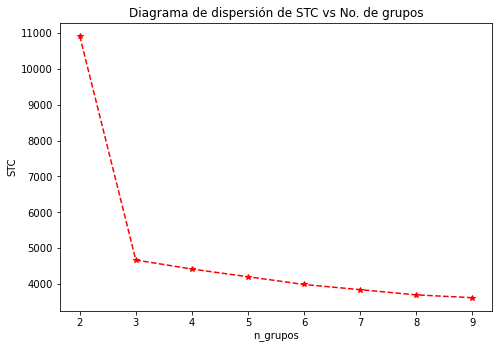

In [18]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.plot(n_grupos, STC, color = 'r', linestyle = '--', marker = '*')
axes.set_title('Diagrama de dispersión de STC vs No. de grupos')
axes.set_xlabel('n_grupos')
axes.set_ylabel('STC')
plt.show()

Teniendo en cuenta la distancia que hay entre agrupamiento y agrupamiento, tal y como se observa en el eje de STC, y que hay un salto importante entre los grupos 2 y 3, tal como se observa en el eje n_grupos, se puede concluir que el número de grupos esperado sí es 3. 